# Práctica 4

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Codificación-por-predicción-lineal" data-toc-modified-id="Codificación-por-predicción-lineal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Codificación por predicción lineal</a></span><ul class="toc-item"><li><span><a href="#Resolución-de-las-ecuaciones-normales,-método-iterativo-de-Levinson-Durbin" data-toc-modified-id="Resolución-de-las-ecuaciones-normales,-método-iterativo-de-Levinson-Durbin-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Resolución de las ecuaciones normales, método iterativo de Levinson-Durbin</a></span><ul class="toc-item"><li><span><a href="#Resolver-20-coeficientes-de-prediccion-lineal,-por-inversion-y-por-método-iterativo-y-comparar-resultados" data-toc-modified-id="Resolver-20-coeficientes-de-prediccion-lineal,-por-inversion-y-por-método-iterativo-y-comparar-resultados-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Resolver 20 coeficientes de prediccion lineal, por inversion y por método iterativo y comparar resultados</a></span></li><li><span><a href="#Con-los-coeficientes-obtenidos-grafique-la-envolvente-del-espectro-del-tracto-vocal-y-compararlo-con-su-espectro" data-toc-modified-id="Con-los-coeficientes-obtenidos-grafique-la-envolvente-del-espectro-del-tracto-vocal-y-compararlo-con-su-espectro-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Con los coeficientes obtenidos grafique la envolvente del espectro del tracto vocal y compararlo con su espectro</a></span></li><li><span><a href="#Ahora-calcule-todos-los-coeficientes-de-fantasia.wav-cada-10-ms-por-25ms" data-toc-modified-id="Ahora-calcule-todos-los-coeficientes-de-fantasia.wav-cada-10-ms-por-25ms-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Ahora calcule todos los coeficientes de fantasia.wav cada 10 ms por 25ms</a></span></li></ul></li><li><span><a href="#Otros-parametros-para-la-codificación" data-toc-modified-id="Otros-parametros-para-la-codificación-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Otros parametros para la codificación</a></span><ul class="toc-item"><li><span><a href="#Detector-de-sonoridad" data-toc-modified-id="Detector-de-sonoridad-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Detector de sonoridad</a></span></li><li><span><a href="#Detector-de-fundamental" data-toc-modified-id="Detector-de-fundamental-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Detector de fundamental</a></span></li><li><span><a href="#Utilice-los-detectores-en-la-señal-fantasia.wav-y-fantasia_noisy.wav.-Compare-los-resultados" data-toc-modified-id="Utilice-los-detectores-en-la-señal-fantasia.wav-y-fantasia_noisy.wav.-Compare-los-resultados-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Utilice los detectores en la señal fantasia.wav y fantasia_noisy.wav. Compare los resultados</a></span></li><li><span><a href="#Calcule-la-energía-de-la-señal-y-corrija-los-resultados" data-toc-modified-id="Calcule-la-energía-de-la-señal-y-corrija-los-resultados-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Calcule la energía de la señal y corrija los resultados</a></span></li></ul></li><li><span><a href="#Error-de-predicción" data-toc-modified-id="Error-de-predicción-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Error de predicción</a></span><ul class="toc-item"><li><span><a href="#Genere-la-señal-de-error" data-toc-modified-id="Genere-la-señal-de-error-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Genere la señal de error</a></span></li><li><span><a href="#Sintetice-la-señal-con-los-coeficientes-y-la-señal-de-error-calculados" data-toc-modified-id="Sintetice-la-señal-con-los-coeficientes-y-la-señal-de-error-calculados-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Sintetice la señal con los coeficientes y la señal de error calculados</a></span></li><li><span><a href="#Repetir-el-ejericio-2-pero-con-la-señal-de-error" data-toc-modified-id="Repetir-el-ejericio-2-pero-con-la-señal-de-error-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Repetir el ejericio 2 pero con la señal de error</a></span></li></ul></li><li><span><a href="#LPC-como-metodo-para-identificación-de-fonemas" data-toc-modified-id="LPC-como-metodo-para-identificación-de-fonemas-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>LPC como metodo para identificación de fonemas</a></span><ul class="toc-item"><li><span><a href="#&quot;fantasaa&quot;-y-&quot;fintisii&quot;" data-toc-modified-id="&quot;fantasaa&quot;-y-&quot;fintisii&quot;-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>"fantasaa" y "fintisii"</a></span></li></ul></li></ul></li></ul></div>

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy import io
import scipy.io.wavfile as wav
from scipy.linalg import toeplitz
%matplotlib notebook
plt.rcParams['figure.figsize']=(6,3)

## Codificación por predicción lineal
### Resolución de las ecuaciones normales, método iterativo de Levinson-Durbin
#### Resolver 20 coeficientes de prediccion lineal, por inversion y por método iterativo y comparar resultados

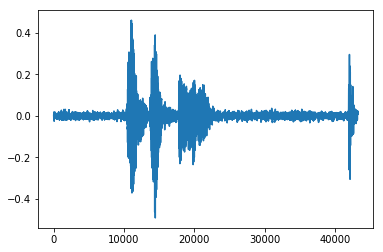

In [3]:
(Fs,fantasia) = wav.read('fantasia.wav')
fantasia = fantasia.astype(float)/32767
fig, ax1 = plt.subplots()
ax1.plot(fantasia)

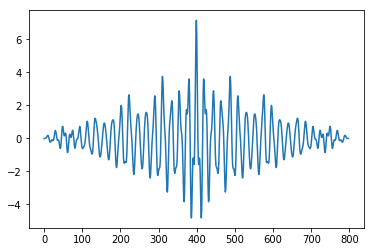

In [25]:
M=20
ventana=fantasia[14000:14000+np.int(Fs*.025)]
autocorrelacion=signal.correlate(ventana, ventana,'full','direct')
coef=autocorrelacion[int(Fs*.025)-1:int(Fs*.025)+M-1]
fig, ax1 = plt.subplots()
ax1.plot(autocorrelacion)

Por inversión

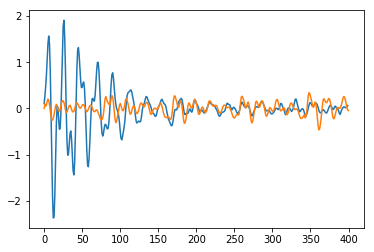

In [26]:
A=toeplitz(coef[:-1],coef[:-1])
b=np.array([coef[1:]])
ai=np.dot(b,np.linalg.inv(A))
bi=np.array([1])
(sest,z)=signal.lfilter(bi,np.hstack((1,-ai[0,:])),error[14000:14400],zi=ventana[:M-1])
fig,ax1=plt.subplots()
ax1.plot(sest)
ax1.plot(np.hstack((0,ventana)))
#print(sest)

Por Levinson-Durbin

#### Con los coeficientes obtenidos grafique la envolvente del espectro del tracto vocal y compararlo con su espectro

<IPython.core.display.Javascript object>


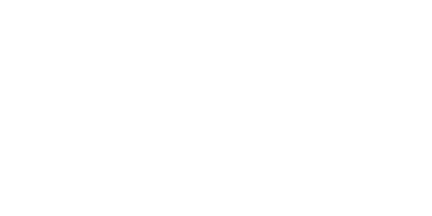

<IPython.core.display.Javascript object>


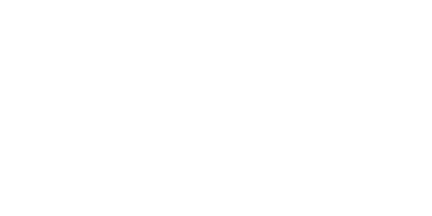

In [32]:
a=np.hstack((1,-ai.reshape(M-1)))
w,espectro = signal.freqz(bi,a)
fig,ax1 = plt.subplots()
ax1.plot(w*Fs/2/np.pi,np.abs(espectro))
#ax1.set(xscale='log')
#ax2.plot(np.linspace(0,Fs,1024),
#         np.abs(np.fft.fft(np.hstack((ventana*np.hamming(ventana.size),np.zeros(1024-ventana.size))))))
#ax2.set(xlim=(0,8000)
#        ,xscale='log'
#       )

#### Ahora calcule todos los coeficientes de fantasia.wav cada 10 ms por 25ms

<class 'numpy.ndarray'>


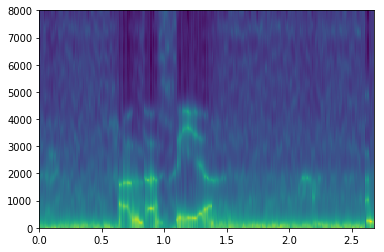

In [19]:
dur = .025
overlap = .01
M = 20
bi = np.array([1])
LPC_coef=[]
LPC_spec=[]

ventana = fantasia[:int(Fs*dur)]
autocorrelacion = signal.correlate(ventana,ventana,'full','direct')
coef = autocorrelacion[int(Fs*dur)-1:int(Fs*dur)+M-1]
A = toeplitz(coef[:-1],coef[:-1])
b = np.array([coef[1:]])
ai = np.dot(b,np.linalg.inv(A))
a = np.hstack((1,-ai.reshape(M-1)))
w,espectro = signal.freqz(bi,a)
LPC_coef = np.array([ai]).T
LPC_spec = np.array([espectro]).T
for i in np.arange(int(Fs*overlap),fantasia.size,int(Fs*overlap)):
    ventana = fantasia[i:i+int(Fs*dur)]
    if not(ventana.size==int(Fs*dur)):
        break
    autocorrelacion = signal.correlate(ventana,ventana,'full','direct')
    coef = autocorrelacion[int(Fs*dur)-1:int(Fs*dur)+M-1]
    A = toeplitz(coef[:-1],coef[:-1])
    b = np.array([coef[1:]])
    ai = np.dot(b,np.linalg.inv(A))
    a=np.hstack((1,-ai.reshape(M-1)))
    w,espectro = signal.freqz(bi,a)
    LPC_coef = np.hstack((LPC_coef,np.array([ai]).T))
    LPC_spec = np.hstack((LPC_spec,np.array([espectro]).T))
t=np.linspace(0,.01*LPC_spec.shape[1],LPC_spec.shape[1])
f=np.linspace(0,Fs/2,512)
fig,ax1=plt.subplots()
ax1.pcolormesh(t,f,20*np.log10(np.abs(LPC_spec)))
print(type(LPC_spec))

<IPython.core.display.Javascript object>


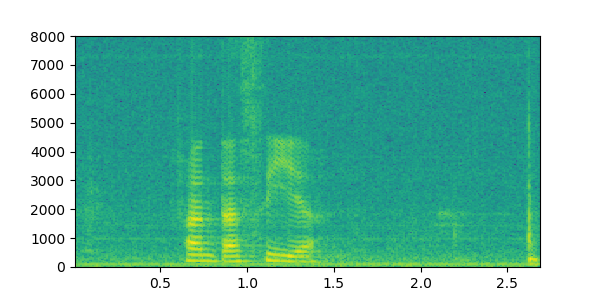

(array([[9.01721728e-08, 1.77454907e-09, 2.34509852e-08, ...,
         3.30040243e-08, 5.21800358e-09, 6.61633508e-10],
        [2.46588713e-07, 1.00963642e-07, 9.73266555e-08, ...,
         2.84096911e-07, 4.26657575e-08, 1.30823178e-09],
        [3.85572871e-07, 2.44913330e-07, 2.23610915e-07, ...,
         1.28950618e-06, 1.99753818e-07, 3.89734240e-09],
        ...,
        [2.98708712e-11, 1.40906223e-10, 6.41612635e-10, ...,
         2.79078177e-10, 5.41095553e-11, 1.84646913e-11],
        [6.41524294e-11, 7.27218885e-11, 5.58800640e-10, ...,
         2.96518542e-10, 5.76205821e-11, 7.56014106e-11],
        [4.32575722e-11, 1.06012868e-11, 2.62926281e-10, ...,
         1.41534528e-10, 1.85893215e-11, 6.23208118e-11]]),
 array([   0.   ,   15.625,   31.25 ,   46.875,   62.5  ,   78.125,
          93.75 ,  109.375,  125.   ,  140.625,  156.25 ,  171.875,
         187.5  ,  203.125,  218.75 ,  234.375,  250.   ,  265.625,
         281.25 ,  296.875,  312.5  ,  328.125,  343.75 ,  35

In [56]:
fig,ax1=plt.subplots()
ax1.specgram(fantasia,NFFT=int(Fs*.025),Fs=Fs,window=np.hamming(int(Fs*.025)),noverlap=int(Fs*0.015),pad_to=1024)

### Otros parametros para la codificación
#### Detector de sonoridad
#### Detector de fundamental
Primer pico de la correlación

#### Utilice los detectores en la señal fantasia.wav y fantasia_noisy.wav. Compare los resultados
#### Calcule la energía de la señal y corrija los resultados
### Error de predicción
#### Genere la señal de error

43266 43280


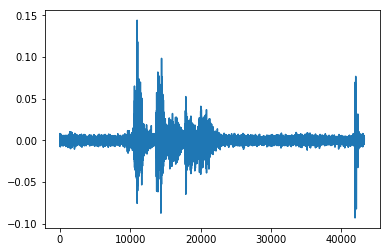

In [20]:
error = signal.lfilter(np.hstack((1,-LPC_coef[:,0,0])),bi,fantasia[:int(Fs*dur)])
for i in np.arange(int(Fs*overlap)-M,int(fantasia.size-Fs*dur),int(Fs*overlap)):
    LPC_coef_i=int(i/(overlap*Fs))
#    sest = signal.lfilter(bi,LPC_coef(:,LPC_coef_i,0),fantasia[i:int(i+Fs*overlap)])
    er=signal.lfilter(np.hstack((1,-LPC_coef[:,LPC_coef_i,0])),bi,fantasia[i:i+int(Fs*dur)])
    error=np.hstack((error,er[-int(Fs*overlap):]))
#er=signal.lfilter(np.hstack((1,-LPC_coef[:,LPC_coef_i,0])),bi,fantasia[i+int(Fs*overlap):])
#error=np.hstack((error,er[M:]))
# plot
fig,ax1=plt.subplots()
ax1.plot(error)
print(fantasia.size,error.size)

#### Sintetice la señal con los coeficientes y la señal de error calculados

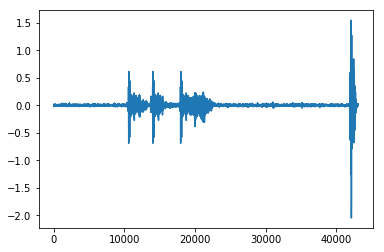

In [23]:
fantasia_sint=signal.lfilter(bi,np.hstack((1,-LPC_coef[:,0,0])),error[:int(Fs*dur)])
for i in np.arange(int(Fs*overlap),fantasia.size-int(Fs*dur),int(Fs*overlap)):
    LPC_coef_i=int(i/Fs/overlap)
    (sint,z)=signal.lfilter(bi,np.hstack((1,-LPC_coef[:,LPC_coef_i,0])),error[i:i+int(Fs*dur)],zi=fantasia_sint[-M+1:])
    fantasia_sint=np.hstack((fantasia_sint,sint[-int(Fs*overlap):]))
fig,ax1=plt.subplots()
ax1.plot(fantasia_sint)
audio=fantasia_sint*32000
wav.write('fantasia_sint.wav',Fs,audio.astype('int16'))

In [13]:
%%html
<audio controls>
    <source src="fantasia_sint.wav" type="audio/wav" preload='none'>
</audio>

#### Repetir el ejericio 2 pero con la señal de error
### LPC como metodo para identificación de fonemas
#### "fantasaa" y "fintisii"
Cambios para que diga "fantasaa"

In [17]:
t_fonema_A = 0.65 # tiempo donde hay una A
f_fonema_A = t_fonema_A/overlap #frame LPC donde esta la A
coef_fonema_A = LPC_coef[:,int(f_fonema_A),0]
t_diptongo_IA = 1.109
d_diptongo_IA = 0.304
# Cambio de los frames
f_diptongo_IA = t_diptongo_IA/overlap
df_diptongo_IA = d_diptongo_IA/overlap
for i in np.arange(0,int(df_diptongo_IA)):
    LPC_coef[:,int(f_diptongo_IA)+i,0]=coef_fonema_A
# Cambio del error
error[int(Fs*t_diptongo_IA):int(Fs*(t_diptongo_IA+d_diptongo_IA))]=error[int(Fs*t_fonema_A):
                                                                         int(Fs*(t_fonema_A+d_diptongo_IA))]

Cambios para que diga "fintisii"

In [22]:
t_fonema_I = 1.1
f_fonema_I = t_fonema_I/overlap
coef_fonema_I = LPC_coef[:,int(f_fonema_I),0]
t_fonema_A1 = 0.649
d_fonema_A1 = 0.097
t_fonema_A2 = 0.863
d_fonema_A2 = 0.100
t_diptongo_IA = 1.109
d_diptongo_IA = 0.304
# Cambio de frames
auxf = t_fonema_A1/overlap
auxd = d_fonema_A1/overlap
for i in np.arange(0,int(auxd)):
    LPC_coef[:,int(auxf)+i,0]=coef_fonema_I
auxf = t_fonema_A2/overlap
auxd = d_fonema_A2/overlap
for i in np.arange(0,int(auxd)):
    LPC_coef[:,int(auxf)+i,0]=coef_fonema_I 
auxf = t_diptongo_IA/overlap
auxd = d_diptongo_IA/overlap
for i in np.arange(0,int(auxd)):
    LPC_coef[:,int(auxf)+i,0]=coef_fonema_I
# Cambio del error
error[int(Fs*t_fonema_A1):int(Fs*(t_fonema_A1+d_fonema_A1))] = error[int(Fs*t_fonema_I):
                                                                     int(Fs*(t_fonema_I+d_fonema_A1))]
error[int(Fs*t_fonema_A2):int(Fs*(t_fonema_A2+d_fonema_A2))] = error[int(Fs*t_fonema_I):
                                                                     int(Fs*(t_fonema_I+d_fonema_A2))]
error[int(Fs*t_diptongo_IA):int(Fs*(t_diptongo_IA+d_diptongo_IA))]=error[int(Fs*t_fonema_I):
                                                                         int(Fs*(t_fonema_I+d_diptongo_IA))]